## ‰∏Ä„ÄÅËØªÂèñÊï∞ÊçÆ

In [1]:
!pip install matplotlib
!pip install wordcloud
!pip install jieba

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 168.9/168.9 kB 5.0 MB/s eta 0:00:00a 0:00:01
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 19.2/19.2 MB 6.3 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for jieba: filename=jieba-0.42.1-py3-none-any.whl size=19314459 sha256=af27b80f6b3f9ba55629b3d747938fbbf963a27a26768df28bb4ec218fd8466a
  Stored in directory: /Users/kaiyi/Library/Caches/pip/wheels/08/a1/a3/5c8ac52cc2f5782ffffc34c95c57c8e5ecb3063dc69541ee7c
Successfully built jieba


In [3]:
pip install snownlp

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
#ÂØºÂÖ•ÂøÖË¶ÅÁöÑÂ∫ì
#ÂØºÂÖ•ÂøÖË¶ÅÁöÑÂ∫ì
import pandas as pd
import numpy as np
from datetime import datetime
import re
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from wordcloud import WordCloud
from collections import Counter

In [5]:
#ËØªÂèñÊï∞ÊçÆÊñá‰ª∂
df = pd.read_csv('merged_output.csv')

print(df.index)
print(df.columns)


RangeIndex(start=0, stop=2230, step=1)
Index(['content', '_id', 'like_counts', 'ip_location', 'created_at',
       'total_number', 'user_name', 'gender'],
      dtype='object')


## ‰∫å„ÄÅÊï∞ÊçÆÊ∏ÖÊ¥ó

In [6]:
#Ê£ÄÊü•ÈáçÂ§çÊï∞ÊçÆ
print(df.duplicated(subset='_id').sum())  # ÊòæÁ§∫idÂàó‰∏≠ÈáçÂ§çÊï∞ÊçÆÁöÑÊï∞Èáè

80


In [7]:
#‰ΩøÁî®drop_duplicatesÊñπÊ≥ïÔºåÂπ∂ÊåáÂÆösubsetÂèÇÊï∞‰∏∫idÔºåËøôÊ†∑Âè™‰ºöÊ†πÊçÆidÂàóÊù•ËØÜÂà´ÈáçÂ§çË°å„ÄÇ
df.drop_duplicates(subset='_id', inplace=True)

In [8]:
#Á°ÆËÆ§ÂéªÈô§ÈáçÂ§çÊï∞ÊçÆÂêéÁöÑÁªìÊûú
print(df.duplicated(subset='_id').sum())  # Â∫îËæìÂá∫0ÔºåË°®Á§∫Ê≤°ÊúâÈáçÂ§çÁöÑid

0


#Ê£ÄÊü•content‰∏∫Á©∫ÁöÑÊï∞ÊçÆ

In [9]:
#Ê£ÄÊü•content‰∏∫Á©∫ÁöÑÊï∞ÊçÆ
print(df['content'].isna().sum())  # ÊòæÁ§∫contentÂàó‰∏≠Á©∫ÂÄºÁöÑÊï∞Èáè

0


#ËØ¥ÊòéÊ≤°ÊúâÂèëÁé∞content‰∏∫Á©∫ÁöÑÊï∞ÊçÆ

In [10]:
# ËÆ°ÁÆóÊØèÊù°ËØÑËÆ∫ÁöÑÂ≠óÁ¨¶ÈïøÂ∫¶
df['content_length'] = df['content'].str.len()

# ÊâæÂá∫Â∞ë‰∫é5‰∏™Â≠óÁöÑËØÑËÆ∫
short_comments = df[df['content_length'] < 5]

# ÊâìÂç∞ÁªüËÆ°‰ø°ÊÅØ
print(f"ËØÑËÆ∫ÊÄªÊï∞: {len(df)}")
print(f"Â∞ë‰∫é5Â≠óÁöÑËØÑËÆ∫Êï∞Èáè: {len(short_comments)}")

ËØÑËÆ∫ÊÄªÊï∞: 2150
Â∞ë‰∫é5Â≠óÁöÑËØÑËÆ∫Êï∞Èáè: 197


In [11]:
# Âà†Èô§Â∞ë‰∫é5Â≠óÁöÑËØÑËÆ∫
df = df[df['content'].str.len() >= 5]

# ÈáçÁΩÆÁ¥¢Âºï
df = df.reset_index(drop=True)

# ÊâìÂç∞Ê∏ÖÁêÜÂêéÁöÑÊï∞ÊçÆÈáè
print(f"Ê∏ÖÁêÜÂêéÁöÑÊï∞ÊçÆÈáè: {len(df)}")

Ê∏ÖÁêÜÂêéÁöÑÊï∞ÊçÆÈáè: 1953


In [12]:
#Êääip_locationÂàó‰∏≠ÁöÑÂÄºÁöÑ‚ÄúÊù•Ëá™‚ÄùÂâçÁºÄÂà†Èô§
df['ip_location'] = df['ip_location'].str.replace('Êù•Ëá™', '').str.strip()


In [13]:
display(df)

content               _id  \
0                             ÂõæÁâáËØÑËÆ∫ http://t.cn/A6ncW10g  5094859627037156   
1                                              ÊàëÂíãÊÑüËßâÈÉΩÊòØÊâØÊ∑°  5094853815308695   
2                                              Âà´‰ø°ÂπøÂëäÔºåÁúãÁñóÊïà  5094860929107609   
3     ÂπºÂÑøÂõ≠ÊëáÂè∑Ê≤°Êúâ‰∏≠Ôºå‰∏ÄÂπ¥ÂÖâÂ≠¶Ë¥πÂ∞±4W[Ë£ÇÂºÄ]Ëøò‰∏çÂåÖÂê´ÁîüÊ¥ªË¥πÊúçË£ÖË¥πÁ≠â„ÄÇ„ÄÇ„ÄÇ„ÄÇËÄå‰∏îÔºåÊàë‰∏ªË¶Å‰πüÊòØ‰∏çÊÉ≥...  5094852339435606   
4                                     ÊàëÂè™ÁúãÊï∞ÊçÆÔºåÊúâÂ§öÂ∞ëÈí±ÂèëËøáÊù•[ÂêÉÁìú]  5094856546061749   
...                                                 ...               ...   
1948  ÊàëÂ•áÊÄ™ÔºåÊàëÊòØ‰∏™Áî∑ÁöÑÔºåÂ•≥ÊñπÁîüËÇ≤Ôºå‰∏∫‰ªÄ‰πàÈúÄË¶ÅÁî∑Êñπ‰∫§ÁîüËÇ≤Èô©ÁöÑÔºåÂ•≥ÊñπÊâç‰∫´ÊúâË°•Ë¥¥ÔºüÔºüÔºüÈÇ£‰∫õ‰∏çÁªìÂ©öÁöÑÔºåÊâæ...  5094831514192924   
1949                     ‰∏ÄÂàáÈÉΩÂú®Áî∑Â•≥ÂèåÊñπÊ≠£Â∏∏Â∑•‰ΩúÂπ∂‰∏îÂèÇ‰øùÁöÑÂü∫Á°Ä‰∏äÔºåËøô‰∏™Â∞±ÊéíÈô§‰∫ÜÂæàÂ§ö‰∫∫  5094824610889895   
1950                                          Â∏åÊúõËÉΩÈ¢ÜÂà∞ÂìàÂìàÂìàÂìà  5094821621138601   
1951                                              ÁïôÁùÄ‰ª•ÂêéÁî®  5094821268819849   
1952                                    Â∞ëÁîü‰ºòÁîüÔºåÂπ∏Á¶è‰∏ÄÁîü[doge]  5094820114333762   

      like_counts ip_location                      created_at  total_number  \
0             390          Âåó‰∫¨  Tue Oct 29 17:04:15 +0800 2024            16   
1             129          Âåó‰∫¨  Tue Oct 29 16:41:10 +0800 2024            11   
2             117         Ëè≤ÂæãÂÆæ  Tue Oct 29 17:09:26 +0800 2024             2   
3              86          Â±±‰∏ú  Tue Oct 29 16:35:18 +0800 2024             3   
4              64          ÊµôÊ±ü  Tue Oct 29 16:52:01 +0800 2024             0   
...           ...         ...                             ...           ...   
1948            0          Âπø‰∏ú  Tue Oct 29 15:12:33 +0800 2024             0   
1949            0          Ê±üËãè  Tue Oct 29 14:45:06 +0800 2024             0   
1950            0          Âπø‰∏ú  Tue Oct 29 14:33:13 +0800 2024             0   
1951            0          Âπø‰∏ú  Tue Oct 29 14:31:50 +0800 2024             0   
1952            0          Ë¥µÂ∑û  Tue Oct 29 14:27:14 +0800 2024             0   

                user_name gender  content_length  
0                  MSÂüπÂÖªÂü∫_      f              25  
1             ShowMakerr_      m               8  
2     Á´πÊùñËäíÈûãËΩªËÉúÈ©¨-Serendipity      m               8  
3                    ‰∏ÉÂÖÉÂßìÂêç      m              76  
4                ÈÉëÂú®ËæìÂÖ•0818      m              17  
...                   ...    ...             ...  
1948       ÊîæÂºÄÈÇ£Êù°‰πåË¥ºÁäπÈ±ºËÆ©ÊàëÊù•sha      f              89  
1949             ÊÇ¶Â∑±----Â•≥Áéã      f              30  
1950                ÁîµÂΩ±Èô¢Ê∏∏ÂÆ¢      m               9  
1951                  Â∞èÈ•ºËõô      m               5  
1952              aaÂøÜÂæÄÊòîcc      m              15  

[1953 rows x 9 columns]

In [14]:

# ‰øùÂ≠ò DataFrame Âà∞ CSV Êñá‰ª∂
file_name = 'output.csv'  # Ëá™ÂÆö‰πâÊñá‰ª∂Âêç‚Äúoutput‚Äù
df.to_csv(file_name, index=False)

print(f"DataFrame Â∑≤‰øùÂ≠ò‰∏∫ {file_name}")

DataFrame Â∑≤‰øùÂ≠ò‰∏∫ output.csv


In [15]:
#ÊâìÂç∞Ââç5Ë°åÊï∞ÊçÆ
display(df.head())

content               _id  \
0                          ÂõæÁâáËØÑËÆ∫ http://t.cn/A6ncW10g  5094859627037156   
1                                           ÊàëÂíãÊÑüËßâÈÉΩÊòØÊâØÊ∑°  5094853815308695   
2                                           Âà´‰ø°ÂπøÂëäÔºåÁúãÁñóÊïà  5094860929107609   
3  ÂπºÂÑøÂõ≠ÊëáÂè∑Ê≤°Êúâ‰∏≠Ôºå‰∏ÄÂπ¥ÂÖâÂ≠¶Ë¥πÂ∞±4W[Ë£ÇÂºÄ]Ëøò‰∏çÂåÖÂê´ÁîüÊ¥ªË¥πÊúçË£ÖË¥πÁ≠â„ÄÇ„ÄÇ„ÄÇ„ÄÇËÄå‰∏îÔºåÊàë‰∏ªË¶Å‰πüÊòØ‰∏çÊÉ≥...  5094852339435606   
4                                  ÊàëÂè™ÁúãÊï∞ÊçÆÔºåÊúâÂ§öÂ∞ëÈí±ÂèëËøáÊù•[ÂêÉÁìú]  5094856546061749   

   like_counts ip_location                      created_at  total_number  \
0          390          Âåó‰∫¨  Tue Oct 29 17:04:15 +0800 2024            16   
1          129          Âåó‰∫¨  Tue Oct 29 16:41:10 +0800 2024            11   
2          117         Ëè≤ÂæãÂÆæ  Tue Oct 29 17:09:26 +0800 2024             2   
3           86          Â±±‰∏ú  Tue Oct 29 16:35:18 +0800 2024             3   
4           64          ÊµôÊ±ü  Tue Oct 29 16:52:01 +0800 2024             0   

             user_name gender  content_length  
0               MSÂüπÂÖªÂü∫_      f              25  
1          ShowMakerr_      m               8  
2  Á´πÊùñËäíÈûãËΩªËÉúÈ©¨-Serendipity      m               8  
3                 ‰∏ÉÂÖÉÂßìÂêç      m              76  
4             ÈÉëÂú®ËæìÂÖ•0818      m              17

## ‰∏â„ÄÅÂèØËßÜÂåñÂàÜÊûê

### 3.1„ÄÅIPÂ±ûÂú∞Êü±Áä∂Âõæ

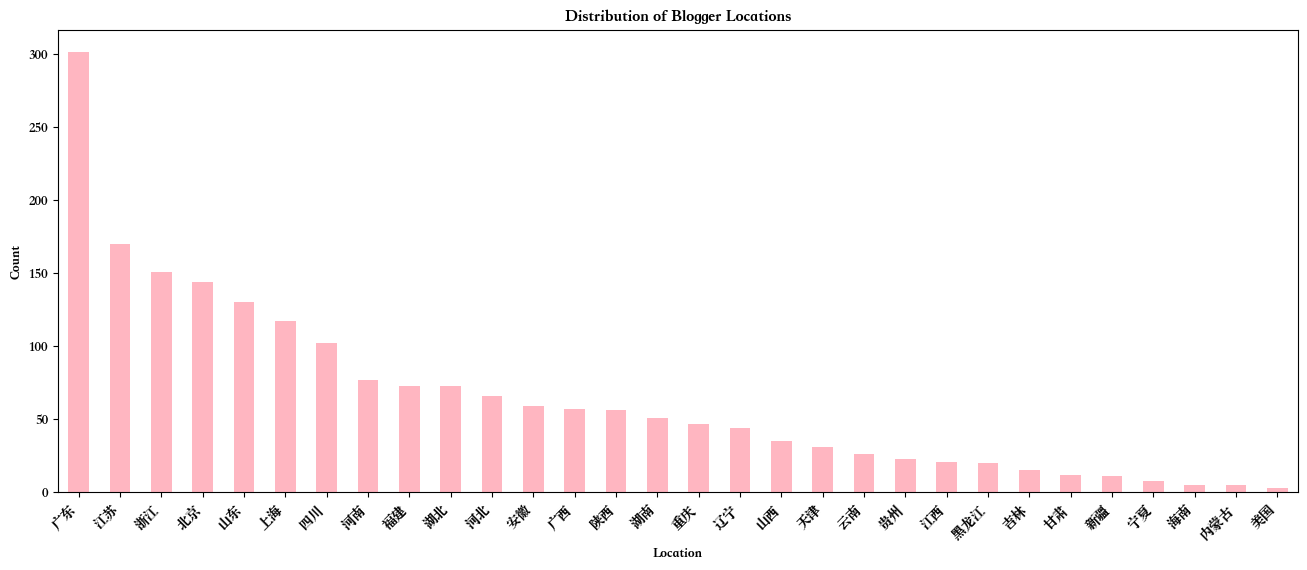

In [16]:

# Set global font
plt.rcParams['font.family'] = 'Songti SC'
plt.rcParams['axes.unicode_minus'] = False  # To display the minus sign normally

# IP location analysis
plt.figure(figsize=(16, 6))
countries = df['ip_location'].value_counts().head(30)  # Only show the top 30

# Using soft pink color
countries.plot(kind='bar', color='#FFB6C1')  # Light pink color

plt.title('Distribution of Blogger Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
# Display the chart
plt.show()


### ÊâìÂç∞ÁÇπËµûÊï∞Ââç30ÁöÑËØÑËÆ∫

In [17]:
# ÊåâÁÇπËµûÊï∞ÊéíÂ∫èÂπ∂ÊòæÁ§∫Ââç30Êù°ËØÑËÆ∫
top_likes = df.nlargest(30, 'like_counts')[['content', 'like_counts', 'created_at']]

# ÊàñËÄÖ‰ΩøÁî®Êõ¥Êï¥Ê¥ÅÁöÑdisplayÊñπÂºèÔºàÂú®Jupyter‰∏≠Ôºâ
display(top_likes)


content  like_counts  \
1387                           ÊØèÂ§©ÂÖ´Â∞èÊó∂Â∑•‰ΩúÂà∂ÔºåÂë®Êú´Âº∫Âà∂Âèå‰ºë„ÄÇÊØîË°•Ë¥¥Âº∫[ÊåñÈºª]        16030   
1388                               ÊïôËÇ≤ÂåªÁñó‰ΩèÊàøÔºåËÉΩËß£ÂÜ≥Ëøô‰∏â‰ª∂‰∫ãÂÜçËÆ©‰∫∫ÁîüÂêß~         8088   
1389                           ÊúâÈí±ÁöÑ‰∫∫ÁîüÂ≠©Â≠êÊâç‰ºöÂπ∏Á¶è Ê≤°Èí±ÁöÑÁîüÂ≠©Â≠êÂè™‰ºöÂä†ÂÄçÁóõËã¶         5213   
1390                        ÈºìÂä±ÈºìÂä±ÈºìÂä±ÔºåÊîØÊåÅÊîØÊåÅÊîØÊåÅ„ÄÇÂÖ¨Âè∏:ÊàëÂêåÊÑè‰ΩÜÊàëËøòÊòØ‰∏çÂΩïÁî®         4311   
1391                                         ‚ÄúÊ≥ïÊãâÂà©5ÂÖÉ‰ª£ÈáëÂà∏‚Äù         3834   
849                                       Âè£Ë¢ãÊ≤°Èí±ÔºåË∞Å‰πüÂà´Âè´ÊàëÁîüÂ≠©Â≠ê         3673   
1392                                      Áõ¥Èù¢Ë∂ÖÊÉ≥‰ºëÔºå‰∏çÊï¢‰ºëÔºå‰∏çËÉΩ‰ºë         2665   
850          ÂÖàÂ∏ÆÊàë‰π∞‰∏äÂ≠¶Âå∫ÊàøÔºåÂÜçÂ∏ÆÊàëÊääÂ•∂Á≤âÈí±ÂüπËÆ≠Ë¥πÊâòÁÆ°Ë¥πÂáÜÂ§áÂ•ΩÔºåÊääÁ§æ‰øù‰∏çÊä•ÈîÄÁöÑÂ§ßÁóÖÂïÜ‰∏öÂåªÁñó‰π∞Â•Ω„ÄÇ         2447   
851   ‰∏ìÂÆ∂Â∞±ÊòØ‰∏çËÇØÁùÅÂºÄÁúºÁúãÁúãÂæàÂ§ö‰∫∫‰∏ÄÂ§©12Â∞èÊó∂ÈÉΩÂú®‰∏äÁè≠Âíå‰∏ä‰∏ãÁè≠Ë∑Ø‰∏äÔºåÂâ©‰∏ã‰∏ÄÁÇπÁÇπËá™Â∑±Êó∂Èó¥ËøòË¶ÅÂêÉÈ•≠Ê∏ÖÁêÜ...         2133   
852                                    ÂΩìÂàùÁöÑÂÆ£‰º†ÁöÑÂ•ΩÔºöÂ∞ëÁîü‰ºòÁîüÂπ∏Á¶è‰∏ÄÁîü         1678   
1393                                   Âπ¥ËΩª‰∫∫ÂØπÊú™Êù•ÁöÑ‰∏çÁ°ÆÂÆöÊÄßÔºåÊâçÊòØÂÖ≥ÈîÆ         1651   
1394  Âçï‰ºëÔºåÊó©‰πùÊôöÂÖ≠ÁÇπÂçäÔºåÂÅ∂Â∞îËøòË¶ÅÂä†Áè≠ÔºåÂà∞ÂÆ∂‰∏ÉÁÇπÂçäÔºåËøôÊó∂Èó¥ÂÆâÊéíÔºåÂ®ÉÂÑø‰∏ä‰∏ãÂ≠¶ÈÉΩÊ≤°‰∫ÜÊé•ÈÄÅÔºåÂë®Êú´‰∏Ä‰∏™‰∫∫Âú®...         1283   
1395                                       Âèå‰ºëÂÖàËêΩÂÆûÂÜçËØ¥Âêß[ÈªëÁ∫ø]         1212   
853                                         ÁªèÊµéÊù°‰ª∂ÊòØÂü∫Á°Ä„ÄÇ[Ë°∞]         1056   
1396                                   ÂÖàËêΩÂÆû35ÂêéÂ∞±Ë¢´ËÅåÂú∫Ê≠ßËßÜÁöÑÈóÆÈ¢òÂêß          966   
1397                                  Âàö‰∏ãÁè≠Á¥ØÁùÄÂë¢‰Ω†ËØ¥Âï•ÈÉΩ‰∏çÂ•Ω‰Ωø[ÂæÆÁ¨ë]          898   
1694                      Ë¶Å‰∏çÊòØÊàëÁé∞Âú®Ê≠£Âú®ÊÄÄÂ≠ï‰∏≠ÔºåÊàëÂ∞±ÁúüÁöÑ‰ø°‰∫ÜËÉΩÈ¢ÜËøô‰πàÂ§ö[Á¨ëcry]          898   
381     ‰∏çÊòØÂïäÔºåÁîü‰∫ÜË∞ÅÂ∏¶ÔºåÂõΩÂÆ∂Âá∫‰∫∫ÂÖçË¥πÂ∏¶ÂêóÔºåÊîæÂ≠¶4ÁÇπË∞ÅÊé•Ôºå6ÁÇπÊâç‰∏ãÁè≠ÔºåÊÄªËØ¥Ê≤°ÊúâÁî®ÁöÑÔºå‰∏ç‰ªéÊ†πÊú¨‰∏äËß£ÂÜ≥ÈóÆÈ¢ò          750   
855                                             ËøûÂ©öÈÉΩÊ≤°‰∫∫Áªì‰∫Ü          603   
1398                ÂÖçË¥π‰Ωè[doge]ÂÖçË¥πËØª[doge]Â∞±Áîü[doge]È©¨‰∏äÂíåÂØπË±°ÁªìÂ©öÁîüÂ®É          603   
854                                 Ê≥ïÂæãÂ•ΩÂÉèËßÑÂÆöÂä†Áè≠Ë¶ÅÁªôÂä†Áè≠Ë¥π[doge]          589   
382                                           ÂÖàÊää‰∫ßÊ£ÄÂÖ®ÂÖç‰∫ÜÂÜçÂè´          494   
1399                           Ë¶ÅÊâøÊãÖÂêÑÁßçË∫´‰ΩìÊçü‰º§Ôºå‰∏çÊÉ≥ÁîüÔºå‰πü‰∏çÂñúÊ¨¢Áîü„ÄÇ[ÂæÆÁ¨ë]          492   
856                                        ÁâõÈ©¨‰∏çÂ§üÁî®‰∫Ü[doge]          478   
1400                            ÂèåËÅåÂ∑•Ë∞ÅÁªôÂ∏¶Â≠©Â≠êÔºåÁé∞Âú®ËÇ≤ÂÑøÂ´Ç‰ª∑Ê†ºÊØî‰∏äÁè≠Êå£ÂæóËøòË¥µ          451   
857                    ÂπºÂÑøÂõ≠ÊëáÂè∑Ê≤°Êúâ‰∏≠Ôºå‰∏ÄÂπ¥ÂÖâÂ≠¶Ë¥πÂ∞±4W[Ë£ÇÂºÄ]Ëøò‰∏çÂåÖÂê´ÁîüÊ¥ªË¥πÊúçË£ÖË¥πÁ≠â          429   
1401                                ‰ªÄ‰πàÊó∂ÂÄôÂ∑≤Â©öÂ∑≤ËÇ≤‰ºòÂÖàËÅòÁî®ÊàëÂ∞±Áîü[ÂÅ∑‰πê]          410   
0                             ÂõæÁâáËØÑËÆ∫ http://t.cn/A6ncW10g          390   
1402             Áõ¥Èù¢‰∫ÜÂêóÔºüÔºüÊ≤°ÊúâÂêßÔºåÁü•ÈÅìÈóÆÈ¢òÂú®Âì™ÈáåÔºåÂèà‰∏çÊï¢Áõ¥Èù¢#ÂÖ®Âäõ‰øÉËøõÊàøÂú∞‰∫ßÂ∏ÇÂú∫Ê≠¢Ë∑åÂõûÁ®≥#          335   
1695                                              ‰∏ÄÂàÜÈí±Ê≤°Êúâ          326   

                          created_at  
1387  Wed Oct 30 18:26:59 +0800 2024  
1388  Wed Oct 30 07:48:41 +0800 2024  
1389  Wed Oct 30 18:42:18 +0800 2024  
1390  Wed Oct 30 18:40:00 +0800 2024  
1391  Wed Oct 30 18:49:37 +0800 2024  
849   Tue Oct 29 15:53:42 +0800 2024  
1392  Wed Oct 30 19:03:40 +0800 2024  
850   Tue Oct 29 16:11:25 +0800 2024  
851   Tue Oct 29 17:06:54 +0800 2024  
852   Tue Oct 29 17:06:16 +0800 2024  
1393  Wed Oct 30 18:45:28 +0800 2024  
1394  Wed Oct 30 18:46:43 +0800 2024  
1395  Wed Oct 30 18:40:48 +0800 2024  
853   Tue Oct 29 16:14:46 +0800 2024  
1396  Wed Oct 30 19:08:38 +0800 2024  
1397 

### 3.2„ÄÅ‰∫íÂä®Êï∞ÂàÜÂ∏ÉÁÆ±‰ΩìÂõæ

/var/folders/2s/f7fc9t5n6ln0h62x2t_q79v80000gn/T/ipykernel_18924/3197068011.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df['like_counts'], positions=[1], labels=['Áî®Êà∑Ê¥ªË∑ÉÂ∫¶'])


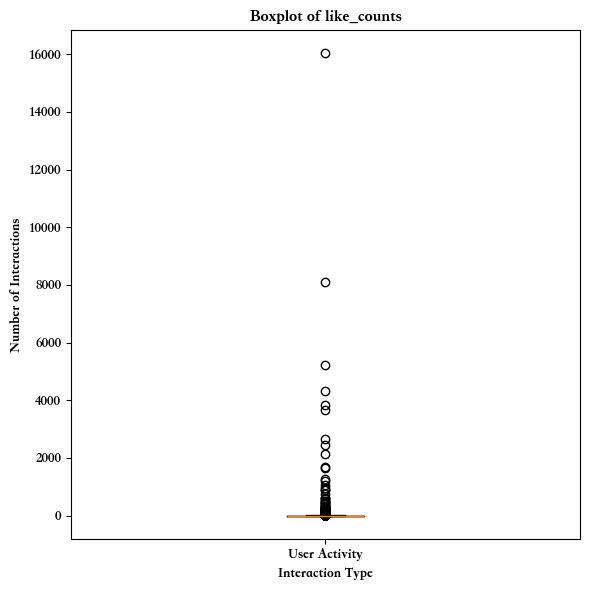

In [17]:
# ÁªòÂà∂ÁÆ±ÂûãÂõæ
plt.figure(figsize=(6, 6))  # ËÆæÁΩÆÂõæË°®Â§ßÂ∞è

# ‰ΩøÁî®matplotlibÁöÑboxplotÂáΩÊï∞
plt.boxplot(df['like_counts'], positions=[1], labels=['Áî®Êà∑Ê¥ªË∑ÉÂ∫¶'])
# ËÆæÁΩÆÂõæË°®Ê†∑Âºè
plt.title('Boxplot of like_counts')
plt.xlabel('Interaction Type')
plt.ylabel('Number of Interactions')
plt.xticks(ticks=[1], labels=['User Activity'])
# ÊòæÁ§∫ÂõæË°®
plt.tight_layout()
plt.show()

### 3.3„ÄÅÊñáÊú¨ÂàÜËØç‰ª•ÂèäÂéªÈô§ÂÅúÁî®ËØç

In [25]:
# ÂØºÂÖ•ÂøÖË¶ÅÁöÑÂ∫ì
import jieba
import re

# ËØªÂèñ‰∏≠ÊñáÂÅúÁî®ËØçË°®
def load_stopwords(file_path='hit_stopwords.txt'):
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            return set([line.strip() for line in f])
    except FileNotFoundError:
        return set()

stop_words = load_stopwords()

# ÊääÊâÄÊúâÁöÑcontentÂÜÖÂÆπËøûÊé•Ëµ∑Êù•
text = ' '.join(df['content'])

# ‰ΩøÁî®Ê≠£ÂàôË°®ËææÂºèÊ∏ÖÁêÜÊñáÊú¨
text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # ËøáÊª§ÁΩëÂùÄ
text = re.sub(r'\[.*?\]', '', text)  # ËøáÊª§ÂæÆÂçöË°®ÊÉÖÔºà‰∏≠Êã¨Âè∑ÂÜÖÂÆπÔºâ
text = re.sub(r'\„Äê.*?\„Äë', '', text)  # ËøáÊª§„Äê„Äë‰∏≠ÁöÑÂÜÖÂÆπ
text = re.sub(r'\n+', ' ', text)  # ËøáÊª§Êç¢Ë°åÁ¨¶
text = re.sub(r'\s+', ' ', text)  # ÂêàÂπ∂Â§ö‰∏™Á©∫Ê†º‰∏∫‰∏Ä‰∏™

print("Ê∏ÖÁêÜÂêéÁöÑÊñáÊú¨:")
print(text[:200])  # Âè™ÊâìÂç∞Ââç200‰∏™Â≠óÁ¨¶

# ‰ΩøÁî®jiebaËøõË°åÂàÜËØç
word_list = jieba.lcut(text)

# ËøáÊª§ÂÅúÁî®ËØçÂíåÈùû‰∏≠ÊñáÂ≠óÁ¨¶
filtered_words = [word for word in word_list 
                 if word not in stop_words 
                 and re.match(r'[\u4e00-\u9fa5]+', word)  # Âè™‰øùÁïô‰∏≠ÊñáÂ≠óÁ¨¶
                 and len(word) > 1]  # ËøáÊª§ÂçïÂ≠óËØç

# Â∞ÜÂàÜËØçÁªìÊûúËøûÊé•ÊàêÂ≠óÁ¨¶‰∏≤
filtered_text = ' '.join(filtered_words)

print('\nÂàÜËØçÁªìÊûúÁ§∫‰æã:')
print(filtered_text[:200])

print('\nËØçËØ≠Êï∞Èáè:', len(filtered_words))

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/2s/f7fc9t5n6ln0h62x2t_q79v80000gn/T/jieba.cache


Ê∏ÖÁêÜÂêéÁöÑÊñáÊú¨:
ÂõæÁâáËØÑËÆ∫ ÊàëÂíãÊÑüËßâÈÉΩÊòØÊâØÊ∑° Âà´‰ø°ÂπøÂëäÔºåÁúãÁñóÊïà ÂπºÂÑøÂõ≠ÊëáÂè∑Ê≤°Êúâ‰∏≠Ôºå‰∏ÄÂπ¥ÂÖâÂ≠¶Ë¥πÂ∞±4WËøò‰∏çÂåÖÂê´ÁîüÊ¥ªË¥πÊúçË£ÖË¥πÁ≠â„ÄÇ„ÄÇ„ÄÇ„ÄÇËÄå‰∏îÔºåÊàë‰∏ªË¶Å‰πüÊòØ‰∏çÊÉ≥Áîü‰∫ÜÂ≠©Â≠ê‰ª•ÂêéËøòÂæóÂÅö‰Ωú‰∏öÔºåÂÜô‰∫ÜÂçÅÊù•Âπ¥‰Ωú‰∏ö‰∫ÜÔºåÊÄï‰∫Ü ÊàëÂè™ÁúãÊï∞ÊçÆÔºåÊúâÂ§öÂ∞ëÈí±ÂèëËøáÊù• ÁîªÈ•ºÊòØÂêßÔºü ÊÉ≥Á©∫ÊâãÂ•óÁôΩÁãºüê∫üê∫üê∫üê∫ Êàë‰ª¨‰∏Ä‰∏™ÊôÆÈÄöÂπºÂÑøÂõ≠‰∏ÄÂ≠¶Êúü1‰∏á4Ôºå‰∏Ä‰∏™ÊúàÂ∑•ËµÑÂ∞±Âõõ‰∫îÂçÉ Ê≤°Êúâ‰∏Ä‰∏™ËêΩÂú∞Êé™ÊñΩÔºåÂÖ®ÊòØÂ§ßÈ•º Á´üËØ¥‰∏Ä‰∫õÂ§ßÁ©∫ËØù ÂÖàÊää‰∫îÂ§©ÂÖ´Â∞èÊó∂ÔºåÂèå‰ºëÂà∂Â∫¶ËêΩÂÆû‰∫ÜÂêß ‰º∞ËÆ°ÂÆûÁé∞‰∏ç‰∫Ü ÂèçÊ≠£Êàë‰∏çÊï¢Áîü Èºì


Loading model cost 0.325 seconds.
Prefix dict has been built successfully.



ÂàÜËØçÁªìÊûúÁ§∫‰æã:
ÂõæÁâá ËØÑËÆ∫ ÊÑüËßâ ÊâØÊ∑° Âà´‰ø° ÂπøÂëä ÁñóÊïà ÂπºÂÑøÂõ≠ ÊëáÂè∑ Ê≤°Êúâ ‰∏ÄÂπ¥ Â≠¶Ë¥π ÂåÖÂê´ ÁîüÊ¥ªË¥π ÊúçË£ÖË¥π ËÄå‰∏î ‰∏ªË¶Å ‰∏çÊÉ≥ Â≠©Â≠ê ‰ª•Âêé ÂÅö‰Ωú‰∏ö ÂçÅÊù• ‰Ωú‰∏ö Êï∞ÊçÆ Â§öÂ∞ë ÂèëËøáÊù• ÁîªÈ•º ÊÉ≥Á©∫ ÊâãÂ•ó ÁôΩÁãº Êàë‰ª¨ ‰∏Ä‰∏™ ÊôÆÈÄö ÂπºÂÑøÂõ≠ Â≠¶Êúü ‰∏Ä‰∏™Êúà Â∑•ËµÑ Âõõ‰∫îÂçÉ Ê≤°Êúâ ‰∏Ä‰∏™ ËêΩÂú∞ Êé™ÊñΩ ÂÖ®ÊòØ Â§ßÈ•º ‰∏Ä‰∫õ Á©∫ËØù ‰∫îÂ§© ÂÖ´Â∞èÊó∂ Âèå‰ºë Âà∂Â∫¶ ËêΩÂÆû ‰º∞ËÆ° ÂÆûÁé∞ ‰∏ç‰∫Ü ÂèçÊ≠£ ‰∏çÊï¢ ÈºìÂä± Áù£‰øÉ ÊîØÊåÅ Âä≥Âä®Ê≥ï ÊØèÂë® Â∑•‰Ωú Êó∂Èó¥ Âä†

ËØçËØ≠Êï∞Èáè: 13926


   word  frequency
0    Â∑•‰Ωú         96
1    ËêΩÂÆû         78
2    ÈóÆÈ¢ò         77
3    Ëß£ÂÜ≥         67
4    ÊïôËÇ≤         61
5    Êó∂Èó¥         58
6    ‰∏çÁîü         55
7    ÈºìÂä±         53
8    ÂÖ¨Âè∏         46
9    ÂæàÂ§ö         42
10   ‰∫åËÉé         42
11   Âèå‰ºë         41
12   Â∞±‰∏ö         41
13   ‰∫ßÂÅá         41
14  Ë∂äÊù•Ë∂ä         41
15   ÁªìÂ©ö         38
16   ÊÄÄÂ≠ï         37
17   Á§æ‰ºö         37
18   Áü•ÈÅì         36
19   ÊîØÊåÅ         35


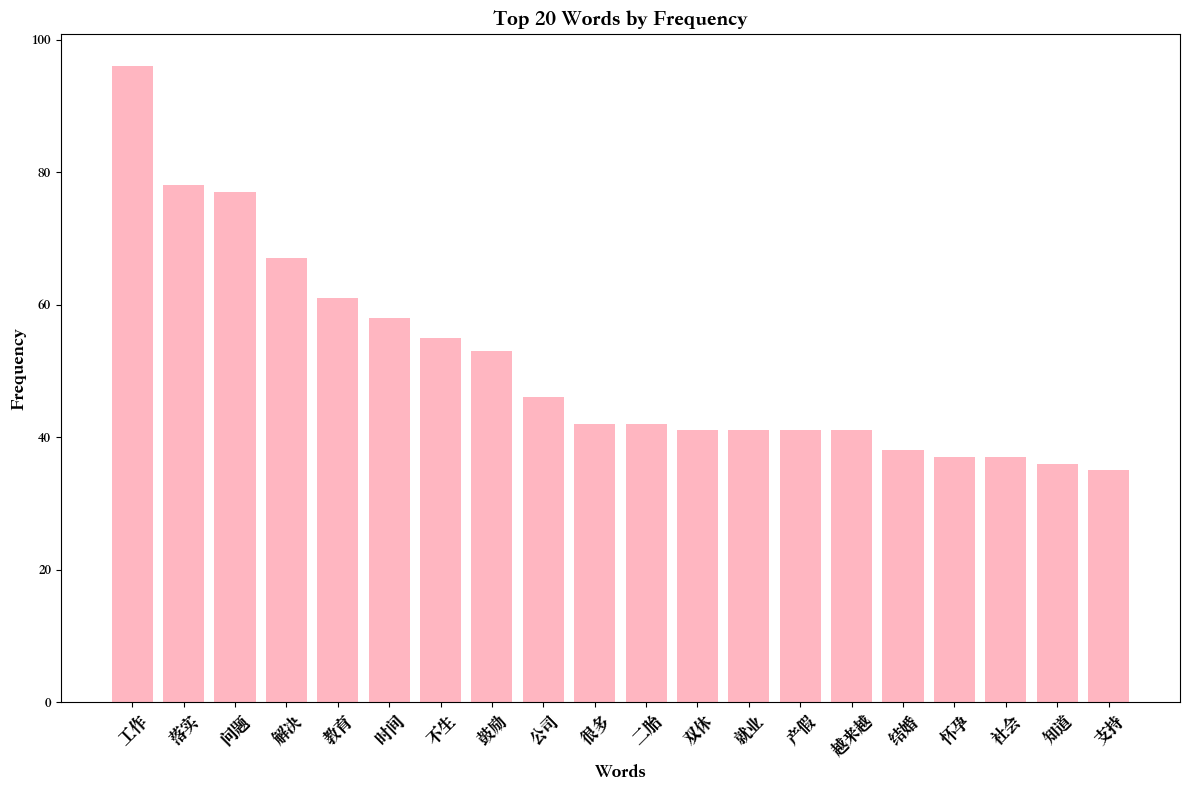

In [ ]:
# ÁªüËÆ°ËØçÈ¢ë
word_counts = Counter(filtered_words)
# ÊåâËØçÈ¢ë‰ªéÂ§ßÂà∞Â∞èÊéíÂ∫è
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Âè™‰øùÁïôÂâç20‰∏™È´òÈ¢ëËØç
top_20_words = sorted_word_counts[:20]

# Â∞ÜËØçÈ¢ëÁªüËÆ°ÁªìÊûúËΩ¨Êç¢‰∏∫DataFrame
word_freq_df = pd.DataFrame(top_20_words, columns=['word', 'frequency'])

# ÊâìÂç∞ËØçÈ¢ëÁªüËÆ°ÁªìÊûú
print(word_freq_df)

# ÂàõÂª∫Êü±Áä∂Âõæ
plt.figure(figsize=(12, 8))

# ÊèêÂèñËØçÊ±áÂíåÈ¢ëÁéá
words = word_freq_df['word']
frequencies = word_freq_df['frequency']

# ÁªòÂà∂Êü±Áä∂Âõæ
plt.bar(words, frequencies, color='#FFB6C1')

# ËÆæÁΩÆÂõæË°®Ê†áÈ¢òÂíåËΩ¥Ê†áÁ≠æ
plt.title('Top 20 Words by Frequency', fontsize=16)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# ÊóãËΩ¨XËΩ¥ÁöÑÊ†áÁ≠æÔºåÈÅøÂÖçÈáçÂè†
plt.xticks(rotation=45, fontsize=12)

# ÊòæÁ§∫ÂõæË°®
plt.tight_layout()  # Ëá™Âä®Ë∞ÉÊï¥Â≠êÂõæÂèÇÊï∞Ôºå‰Ωø‰πãÂ°´ÂÖÖÊï¥‰∏™ÂõæË°®Âå∫Âüü
plt.savefig('top_20_words.png', dpi=300)
plt.show()

### 3.4„ÄÅÊÉÖÊÑüÂàÜÊûê

In [19]:
# ÂÆö‰πâÊ∏ÖÁêÜÊñáÊú¨ÁöÑÂáΩÊï∞
def clean_text(text):
    # ËΩ¨Êç¢‰∏∫Â≠óÁ¨¶‰∏≤
    text = str(text)
    
    # Ê∏ÖÁêÜÂêÑÁßçÊ®°Âºè
    text = re.sub(r'ÂõûÂ§ç@.*?:', '', text)  # Âà†Èô§"ÂõûÂ§ç@Áî®Êà∑:"
    text = re.sub(r'@.*?\s', '', text)     # Âà†Èô§"@Áî®Êà∑"
    text = re.sub(r'\[.*?\]', '', text)    # Âà†Èô§Ë°®ÊÉÖÁ¨¶Âè∑ [Á¨ëÂì≠] Á≠â
    text = re.sub(r'„Äê.*?„Äë', '', text)     # Âà†Èô§„Äê„Äë‰∏≠ÁöÑÂÜÖÂÆπ
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Âà†Èô§ÁΩëÂùÄ
    text = re.sub(r'\n+', ' ', text)       # Âà†Èô§Êç¢Ë°åÁ¨¶
    text = re.sub(r'\s+', ' ', text)       # ÂêàÂπ∂Â§ö‰∏™Á©∫Ê†º
    text = text.strip()                    # Âà†Èô§È¶ñÂ∞æÁ©∫Ê†º
    
    return text

# ÂàõÂª∫Ê∏ÖÁêÜÂêéÁöÑÊñ∞Âàó
df['cleaned_content'] = df['content'].apply(clean_text)

# ÊâìÂç∞‰∏Ä‰∫õÁ§∫‰æãÊü•ÁúãÊ∏ÖÁêÜÊïàÊûú
print("Ê∏ÖÁêÜÂâçÂêéÂØπÊØîÔºö")
for i in range(5):
    print("\nÂéüÊñáÔºö", df['content'].iloc[i])
    print("Ê∏ÖÁêÜÂêéÔºö", df['cleaned_content'].iloc[i])

Ê∏ÖÁêÜÂâçÂêéÂØπÊØîÔºö

ÂéüÊñáÔºö ÂõæÁâáËØÑËÆ∫ http://t.cn/A6ncW10g
Ê∏ÖÁêÜÂêéÔºö ÂõæÁâáËØÑËÆ∫

ÂéüÊñáÔºö ÊàëÂíãÊÑüËßâÈÉΩÊòØÊâØÊ∑°
Ê∏ÖÁêÜÂêéÔºö ÊàëÂíãÊÑüËßâÈÉΩÊòØÊâØÊ∑°

ÂéüÊñáÔºö Âà´‰ø°ÂπøÂëäÔºåÁúãÁñóÊïà
Ê∏ÖÁêÜÂêéÔºö Âà´‰ø°ÂπøÂëäÔºåÁúãÁñóÊïà

ÂéüÊñáÔºö ÂπºÂÑøÂõ≠ÊëáÂè∑Ê≤°Êúâ‰∏≠Ôºå‰∏ÄÂπ¥ÂÖâÂ≠¶Ë¥πÂ∞±4W[Ë£ÇÂºÄ]Ëøò‰∏çÂåÖÂê´ÁîüÊ¥ªË¥πÊúçË£ÖË¥πÁ≠â„ÄÇ„ÄÇ„ÄÇ„ÄÇËÄå‰∏îÔºåÊàë‰∏ªË¶Å‰πüÊòØ‰∏çÊÉ≥Áîü‰∫ÜÂ≠©Â≠ê‰ª•ÂêéËøòÂæóÂÅö‰Ωú‰∏ö[ÂÖÅÊÇ≤]ÔºåÂÜô‰∫ÜÂçÅÊù•Âπ¥‰Ωú‰∏ö‰∫ÜÔºåÊÄï‰∫Ü[Ê≥™]
Ê∏ÖÁêÜÂêéÔºö ÂπºÂÑøÂõ≠ÊëáÂè∑Ê≤°Êúâ‰∏≠Ôºå‰∏ÄÂπ¥ÂÖâÂ≠¶Ë¥πÂ∞±4WËøò‰∏çÂåÖÂê´ÁîüÊ¥ªË¥πÊúçË£ÖË¥πÁ≠â„ÄÇ„ÄÇ„ÄÇ„ÄÇËÄå‰∏îÔºåÊàë‰∏ªË¶Å‰πüÊòØ‰∏çÊÉ≥Áîü‰∫ÜÂ≠©Â≠ê‰ª•ÂêéËøòÂæóÂÅö‰Ωú‰∏öÔºåÂÜô‰∫ÜÂçÅÊù•Âπ¥‰Ωú‰∏ö‰∫ÜÔºåÊÄï‰∫Ü

ÂéüÊñáÔºö ÊàëÂè™ÁúãÊï∞ÊçÆÔºåÊúâÂ§öÂ∞ëÈí±ÂèëËøáÊù•[ÂêÉÁìú]
Ê∏ÖÁêÜÂêéÔºö ÊàëÂè™ÁúãÊï∞ÊçÆÔºåÊúâÂ§öÂ∞ëÈí±ÂèëËøáÊù•



ÊÉÖÊÑüÂàÜÊûêÁªìÊûúÁªüËÆ°Ôºö
Âπ≥ÂùáÊÉÖÊÑüÂæóÂàÜ: 0.358
ÊÉÖÊÑüÂàÜÂ∏É:
sentiment
Ê∂àÊûÅ    1178
ÁßØÊûÅ     461
‰∏≠ÊÄß     314
Name: count, dtype: int64


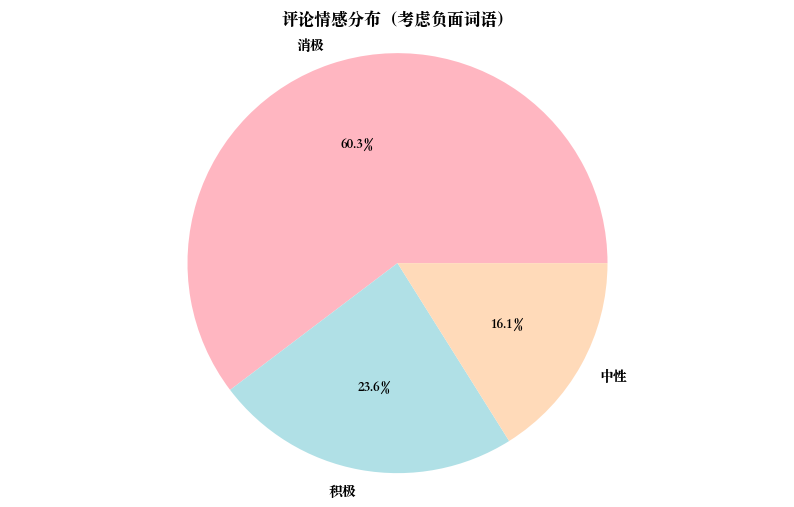


Á§∫‰æãËØÑËÆ∫ÂèäÂÖ∂ÊÉÖÊÑüÂàÜÊûêÔºö

ËØÑËÆ∫: ‰∏Ä‰∏™ÊîØÂéü‰ΩìÔºåÈÉΩËÉΩÂäùÈÄÄÊàë‰∫åËÉé
ÊÉÖÊÑüÂæóÂàÜ: 0.060
ÊÉÖÊÑüÁ±ªÂà´: Ê∂àÊûÅ

ËØÑËÆ∫: ‰Ω†ÂÖàËß£ÂÜ≥‰∏çÁî®‰∏≠ËÄÉÔºåËÉΩÁõ¥Êé•‰∏äÈ´ò‰∏≠ÂÜçËØ¥Âêß
ÊÉÖÊÑüÂæóÂàÜ: 0.392
ÊÉÖÊÑüÁ±ªÂà´: Ê∂àÊûÅ

ËØÑËÆ∫: ÂÆåÂÖ®ÁöÑÁ©∫ËØùÂòõ
ÊÉÖÊÑüÂæóÂàÜ: 0.100
ÊÉÖÊÑüÁ±ªÂà´: Ê∂àÊûÅ
ÂåÖÂê´ÁöÑË¥üÈù¢ËØçËØ≠: ['Á©∫ËØù']

ËØÑËÆ∫: ‰∏çÂÖ≥ÊàëÁöÑ‰∫ã
ÊÉÖÊÑüÂæóÂàÜ: 0.144
ÊÉÖÊÑüÁ±ªÂà´: Ê∂àÊûÅ

ËØÑËÆ∫: ‰∏Ä‰∏™ÊúàË°•Ë¥¥800ÔºåÂÜúÊùëÂ§ßÊää‰∫∫Áîü„ÄÇÊàëÁà∏Â¶àÂú®ÂÜúÊùëÔºåÂõΩÂÆ∂ÂèëÁöÑËÄÅ‰∫∫Èáë‰∏Ä‰∏™ÊúàÊâç‰∏ÄÁôæÂ§öÔºå800Â∑≤ÁªèÊòØÂæàÂ§öÂæàÂ§ö‰∫ÜÔºåÂîâÔºÅ
ÊÉÖÊÑüÂæóÂàÜ: 0.298
ÊÉÖÊÑüÁ±ªÂà´: Ê∂àÊûÅ


In [20]:
from snownlp import SnowNLP

# ËØªÂèñË¥üÈù¢ËØçËØ≠ÂàóË°®
def load_negative_words(file_path='negative_words.txt'):
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            return set([line.strip() for line in f])
    except FileNotFoundError:
        print("Êú™ÊâæÂà∞Ë¥üÈù¢ËØçËØ≠Êñá‰ª∂")
        return set()

negative_words = load_negative_words()

# ‰øÆÊîπÊÉÖÊÑüÂàÜÊûêÂáΩÊï∞ÔºåËÄÉËôëË¥üÈù¢ËØçËØ≠ÁöÑÂΩ±Âìç
def get_sentiment_adjusted(text):
    try:
        # Âü∫Á°ÄÊÉÖÊÑüÂæóÂàÜ
        base_score = SnowNLP(str(text)).sentiments
        
        # Ê£ÄÊü•Ë¥üÈù¢ËØçËØ≠
        text = str(text)
        neg_word_count = sum(1 for word in negative_words if word in text)
        
        # Ê†πÊçÆË¥üÈù¢ËØçËØ≠Êï∞ÈáèË∞ÉÊï¥ÂæóÂàÜ
        if neg_word_count > 0:
            # ÊØè‰∏™Ë¥üÈù¢ËØçÈôç‰Ωé50%ÁöÑÂæóÂàÜÔºåÊúÄÂ§öÈôç‰Ωé90%
            adjustment = min(0.5 * neg_word_count, 0.9)
            adjusted_score = base_score * (1 - adjustment)
            return adjusted_score
        return base_score
    except:
        return None

# Ê∑ªÂä†Ë∞ÉÊï¥ÂêéÁöÑÊÉÖÊÑüÂæóÂàÜÂàó
df['sentiment_score'] = df['cleaned_content'].apply(get_sentiment_adjusted)

# Â∞ÜÊÉÖÊÑüÂæóÂàÜÂàÜ‰∏∫ÁßØÊûÅ„ÄÅÊ∂àÊûÅÂíå‰∏≠ÊÄß
df['sentiment'] = df['sentiment_score'].apply(lambda x: 
    'ÁßØÊûÅ' if x > 0.6 
    else 'Ê∂àÊûÅ' if x < 0.4 
    else '‰∏≠ÊÄß')

# ÊâìÂç∞ÊÉÖÊÑüÂàÜÊûêÁªìÊûúÁªüËÆ°
print("\nÊÉÖÊÑüÂàÜÊûêÁªìÊûúÁªüËÆ°Ôºö")
print(f"Âπ≥ÂùáÊÉÖÊÑüÂæóÂàÜ: {df['sentiment_score'].mean():.3f}")
print(f"ÊÉÖÊÑüÂàÜÂ∏É:")
print(df['sentiment'].value_counts())

# ÁªòÂà∂ÊÉÖÊÑüÂàÜÂ∏ÉÈ•ºÂõæ
plt.figure(figsize=(10, 6))
plt.pie(df['sentiment'].value_counts(), 
        labels=df['sentiment'].value_counts().index, 
        autopct='%1.1f%%', 
        colors=['#FFB6C1', '#B0E0E6', '#FFDAB9'])
plt.title('ËØÑËÆ∫ÊÉÖÊÑüÂàÜÂ∏ÉÔºàËÄÉËôëË¥üÈù¢ËØçËØ≠Ôºâ')
plt.axis('equal')
plt.show()

# ÊâìÂç∞‰∏Ä‰∫õÁ§∫‰æãËøõË°åÂØπÊØî
print("\nÁ§∫‰æãËØÑËÆ∫ÂèäÂÖ∂ÊÉÖÊÑüÂàÜÊûêÔºö")
sample_df = df[['cleaned_content', 'sentiment_score', 'sentiment']].sample(5)
for _, row in sample_df.iterrows():
    print(f"\nËØÑËÆ∫: {row['cleaned_content']}")
    print(f"ÊÉÖÊÑüÂæóÂàÜ: {row['sentiment_score']:.3f}")
    print(f"ÊÉÖÊÑüÁ±ªÂà´: {row['sentiment']}")
    # ÊòæÁ§∫ÂåÖÂê´ÁöÑË¥üÈù¢ËØçËØ≠
    neg_words_found = [word for word in negative_words if word in row['cleaned_content']]
    if neg_words_found:
        print(f"ÂåÖÂê´ÁöÑË¥üÈù¢ËØçËØ≠: {neg_words_found}")

### 3.5„ÄÅÂàÜÂà´ÁªüËÆ°Áî∑Â•≥ÊÄßÊÉÖÊÑü


ÂêÑÊÄßÂà´ÊÉÖÊÑüÂàÜÂ∏ÉÊï∞ÈáèÔºö
sentiment   ‰∏≠ÊÄß   Ê∂àÊûÅ   ÁßØÊûÅ
gender                  
f          168  696  253
m          146  482  208

ÂêÑÊÄßÂà´ÊÉÖÊÑüÂàÜÂ∏ÉÁôæÂàÜÊØîÔºö
sentiment         ‰∏≠ÊÄß         Ê∂àÊûÅ         ÁßØÊûÅ
gender                                    
f          15.040286  62.309758  22.649955
m          17.464115  57.655502  24.880383


<Figure size 1000x600 with 0 Axes>

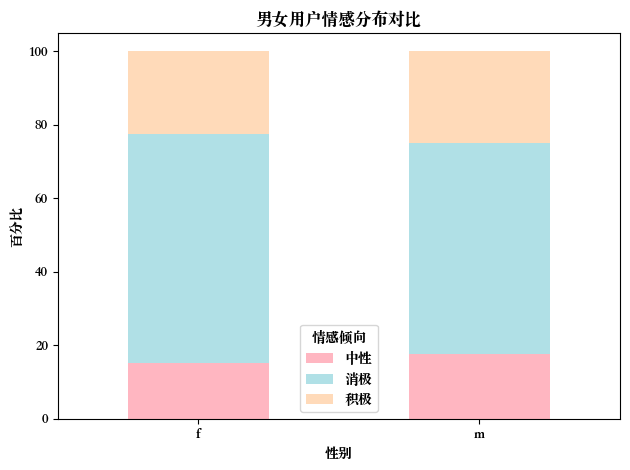

In [22]:
# ÊåâÊÄßÂà´ÂàÜÁªÑÁªüËÆ°ÊÉÖÊÑü
gender_sentiment = df.groupby(['gender', 'sentiment']).size().unstack(fill_value=0)

# ËÆ°ÁÆóÊØè‰∏™ÊÄßÂà´ÁöÑÊÉÖÊÑüÁôæÂàÜÊØî
gender_sentiment_pct = gender_sentiment.div(gender_sentiment.sum(axis=1), axis=0) * 100

# ÊâìÂç∞ÁªüËÆ°ÁªìÊûú
print("ÂêÑÊÄßÂà´ÊÉÖÊÑüÂàÜÂ∏ÉÊï∞ÈáèÔºö")
print(gender_sentiment)
print("\nÂêÑÊÄßÂà´ÊÉÖÊÑüÂàÜÂ∏ÉÁôæÂàÜÊØîÔºö")
print(gender_sentiment_pct)

# ÁªòÂà∂Â†ÜÂè†Êü±Áä∂Âõæ
plt.figure(figsize=(10, 6))
gender_sentiment_pct.plot(kind='bar', stacked=True, 
                         color=['#FFB6C1', '#B0E0E6', '#FFDAB9'])
plt.title('Áî∑Â•≥Áî®Êà∑ÊÉÖÊÑüÂàÜÂ∏ÉÂØπÊØî')
plt.xlabel('ÊÄßÂà´')
plt.ylabel('ÁôæÂàÜÊØî')
plt.legend(title='ÊÉÖÊÑüÂÄæÂêë')
plt.xticks(rotation=0)


plt.tight_layout()
plt.show()





### 3.6„ÄÅÁîüÊàêËØç‰∫ë

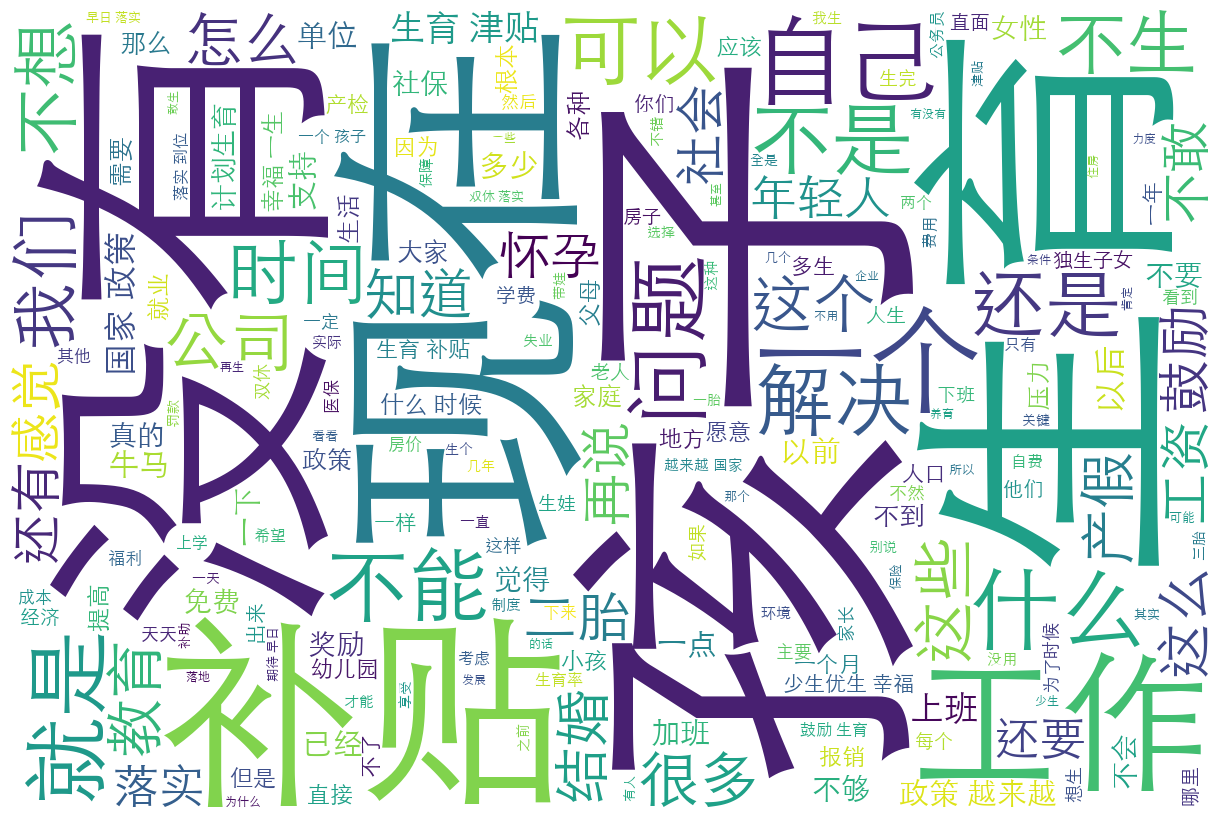

In [ ]:

# ÁîüÊàêËØç‰∫ë
font_path = '/System/Library/Fonts/STHeiti Light.ttc'
wordcloud = WordCloud(
    font_path=font_path, 
    max_words=200, 
    width=1200, 
    height=800, 
    background_color='white',
    colormap='viridis', 
    prefer_horizontal=0.7,  # 70%ÁöÑËØçÊ∞¥Âπ≥ÊòæÁ§∫
    random_state=42  # Âõ∫ÂÆöÈöèÊú∫Áä∂ÊÄÅ‰ª•‰øùÊåÅ‰∏ÄËá¥ÁöÑÊïàÊûú
).generate(filtered_text)

# ÊòæÁ§∫ËØç‰∫ëÂõæ
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # ‰∏çÊòæÁ§∫ÂùêÊ†áËΩ¥
plt.tight_layout(pad=0)  # ÂáèÂ∞ëËæπË∑ù
plt.show()

# ‰øùÂ≠òËØç‰∫ëÂõæÂà∞Êñá‰ª∂
wordcloud.to_file('wordcloud.png')